In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from google.colab import drive
import os
import pandas as pd
from datetime import datetime


# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/churn_prediction.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head(10))


Mounted at /content/drive
   customer_id  vintage  age  gender  dependents     occupation    city  \
0            1     2101   66    Male         0.0  self_employed   187.0   
1            2     2348   35    Male         0.0  self_employed     NaN   
2            4     2194   31    Male         0.0       salaried   146.0   
3            5     2329   90     NaN         NaN  self_employed  1020.0   
4            6     1579   42    Male         2.0  self_employed  1494.0   
5            7     1923   42  Female         0.0  self_employed  1096.0   
6            8     2048   72    Male         0.0        retired  1020.0   
7            9     2009   46    Male         0.0  self_employed   623.0   
8           10     2053   31    Male         0.0       salaried  1096.0   
9           11     2295   40    Male         3.0  self_employed  1020.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2 

| Field Name                     | Description                                                        |
|------------------------------- |--------------------------------------------------------------------|
| customer_id                    | Unique identifier for the customer.                                |
| vintage                        | Age of the customer with the bank (in days).                       |
| age                            | Age of the customer.                                               |
| gender                         | Gender of the customer.                                            |
| dependents                     | Number of dependents for the customer.                             |
| occupation                     | Occupation of the customer.                                        |
| city                           | City code for the customer.                                        |
| customer_nw_category           | Net worth category of the customer (1, 2, or 3).                   |
| branch_code                    | Branch code for the customer.                                      |
| current_balance                | Current account balance of the customer.                           |
| previous_month_end_balance     | Account balance at the end of the previous month.                 |
| average_monthly_balance_prevQ  | Average monthly balance in the previous quarter.                  |
| average_monthly_balance_prevQ2 | Average monthly balance in the quarter before the previous quarter.|
| current_month_credit           | Total credit amount in the current month.                         |
| previous_month_credit          | Total credit amount in the previous month.                        |
| current_month_debit            | Total debit amount in the current month.                          |
| previous_month_debit           | Total debit amount in the previous month.                         |
| current_month_balance          | Average balance in the current month.                             |
| previous_month_balance         | Average balance in the previous month.                            |
| churn                          | Target variable indicating whether the customer will churn (1) or not (0).|
| last_transaction               | Date of the last transaction.                                     |


In [ ]:
#@title Basic Information About the Dataset

# Display the shape of the dataset
print("Dataset Shape:", df.shape)

# Display the data types of each column
print("\nData Types:\n", df.dtypes)

# Display a summary of the dataset
print("\nDataset Summary:\n")
print(df.describe())


Dataset Shape: (28382, 21)

Data Types:
 customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

Dataset Summary:

        customer_id       vintage           

In [ ]:
#@title Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64


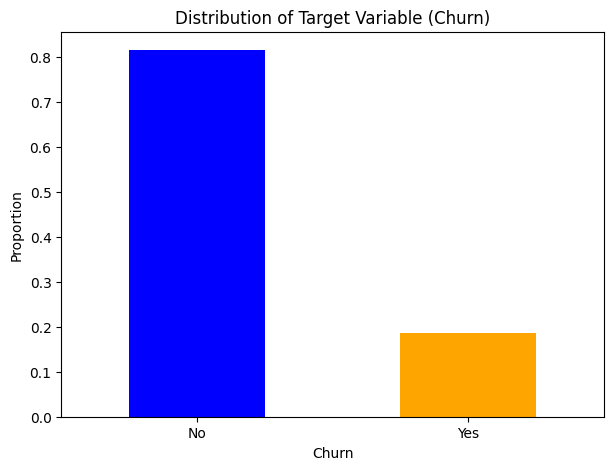

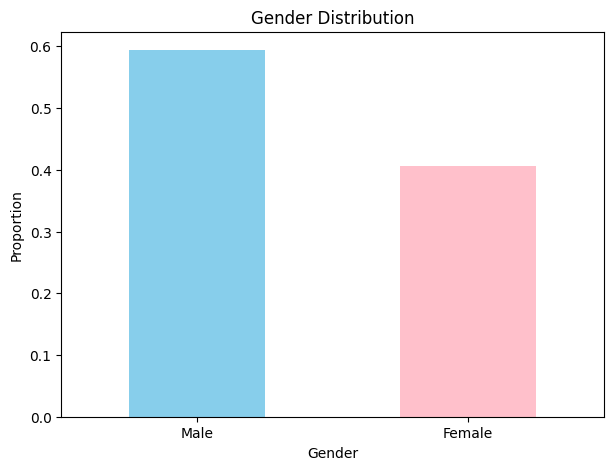

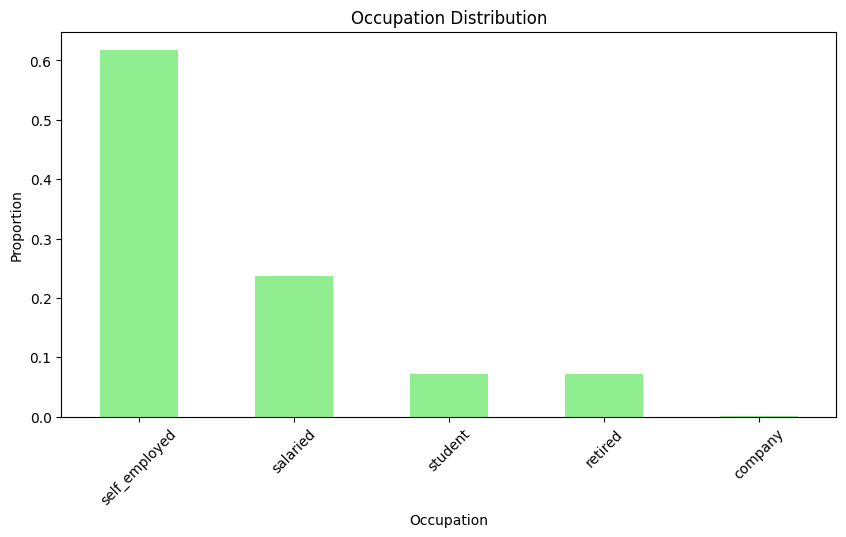

In [ ]:
#@title Data distribution by Categorical variables
# Visualization of the target variable 'churn'
plt.figure(figsize=(7, 5))
df['churn'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)  # Assuming 0 is 'No' and 1 is 'Yes'
plt.show()

# Visualization of the 'gender' distribution
plt.figure(figsize=(7, 5))
df['gender'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'pink', 'green'])  # Assuming 'Male', 'Female', 'Unknown'
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

# Visualization of the 'occupation' distribution
plt.figure(figsize=(10, 5))
occupation_order = df['occupation'].value_counts(normalize=True).index  # To maintain the order from highest to lowest
df['occupation'].value_counts(normalize=True).loc[occupation_order].plot(kind='bar', color='lightgreen')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


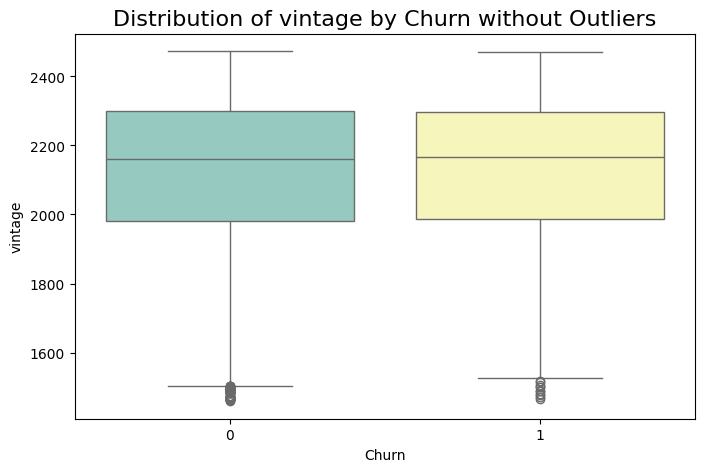

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


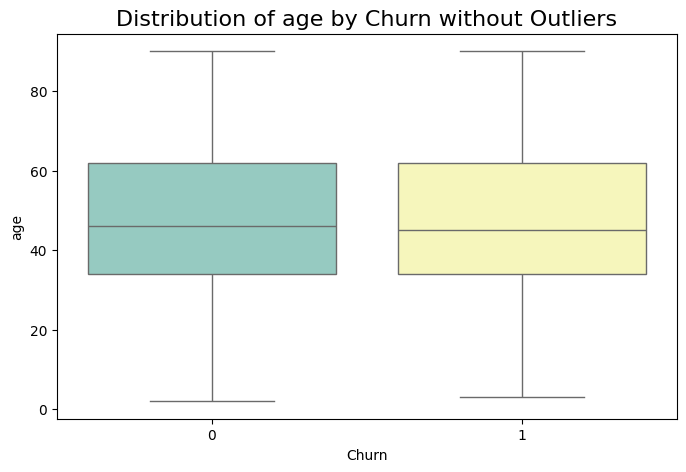

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


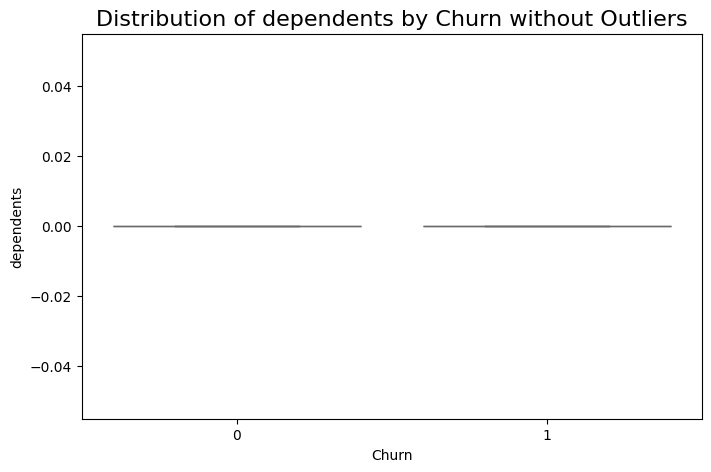

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


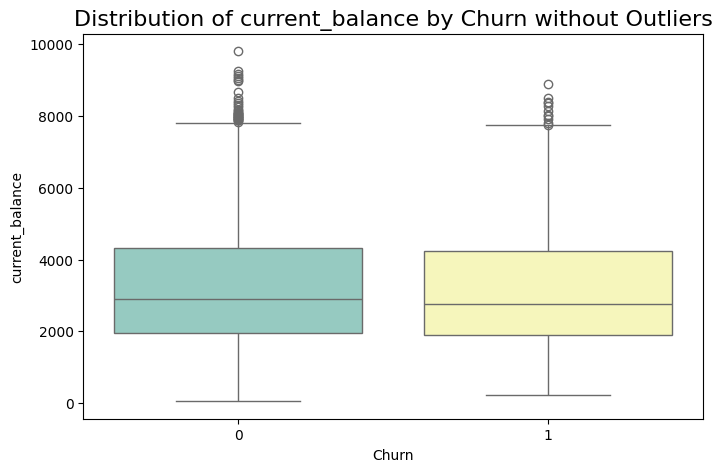

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


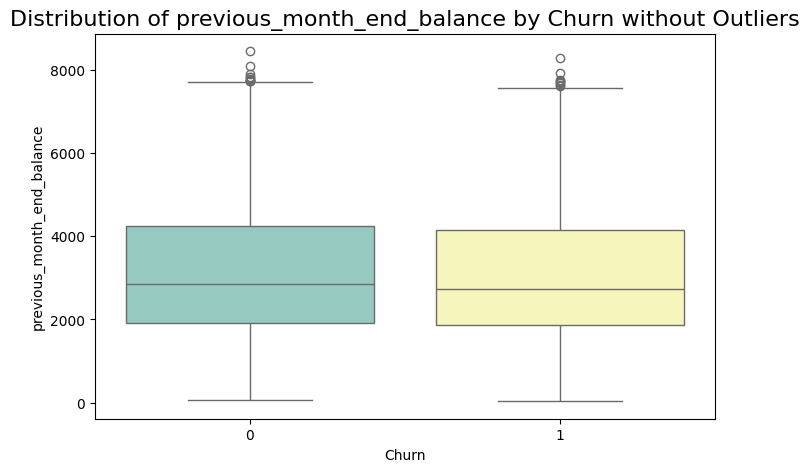

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


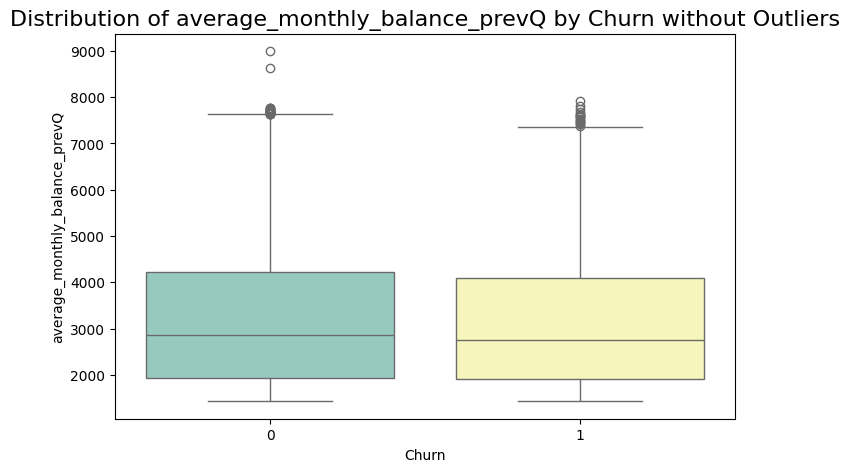

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


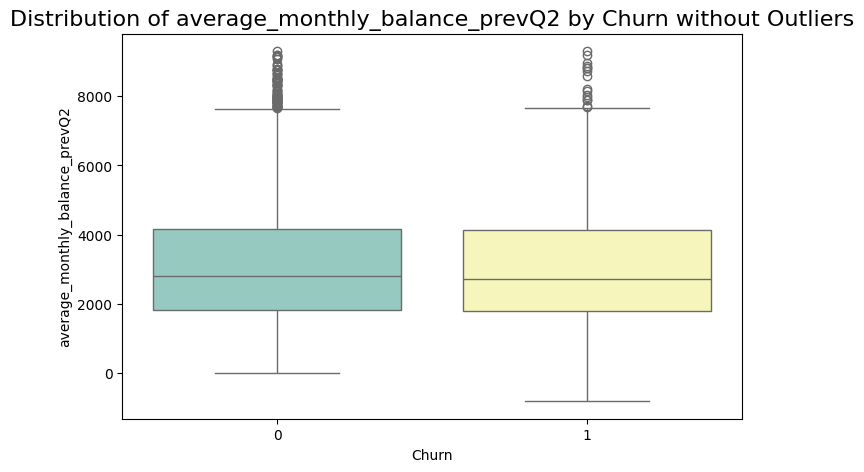

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


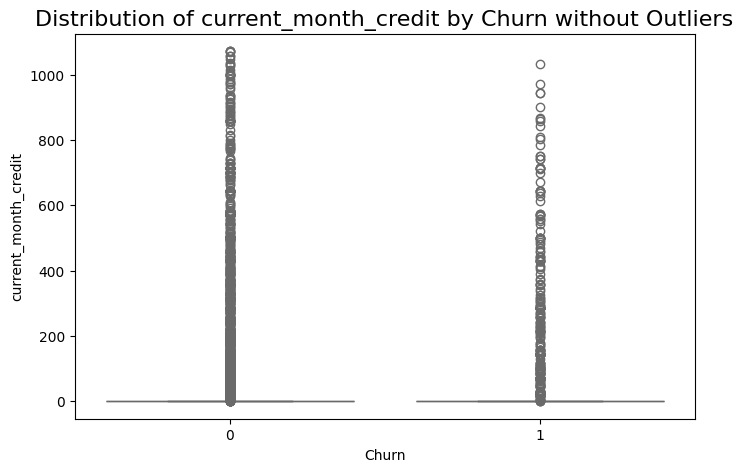

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


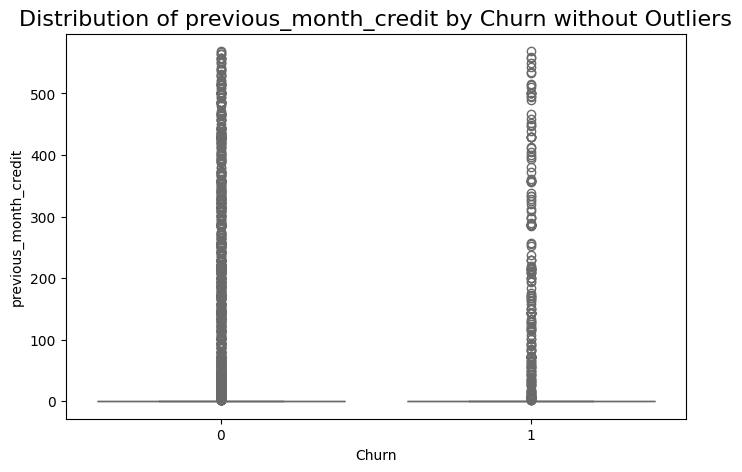

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


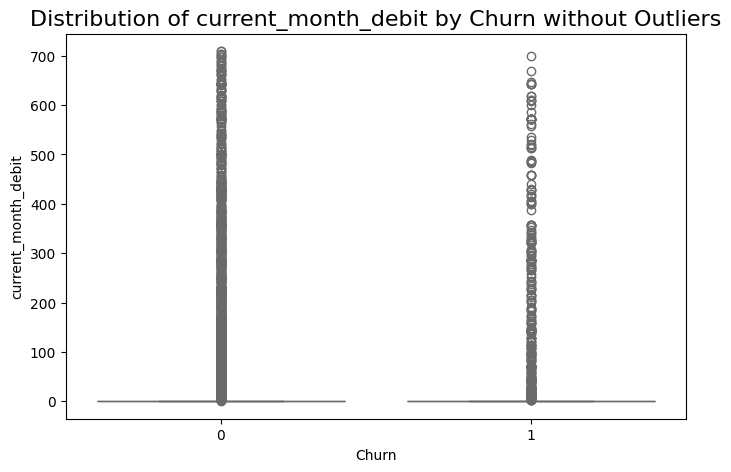

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


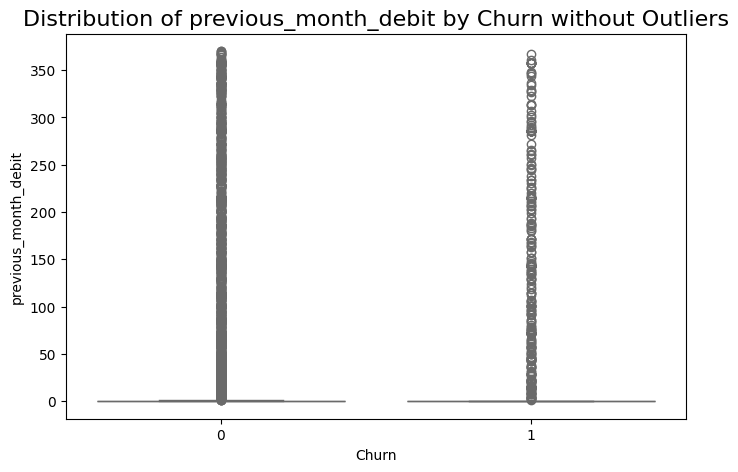

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


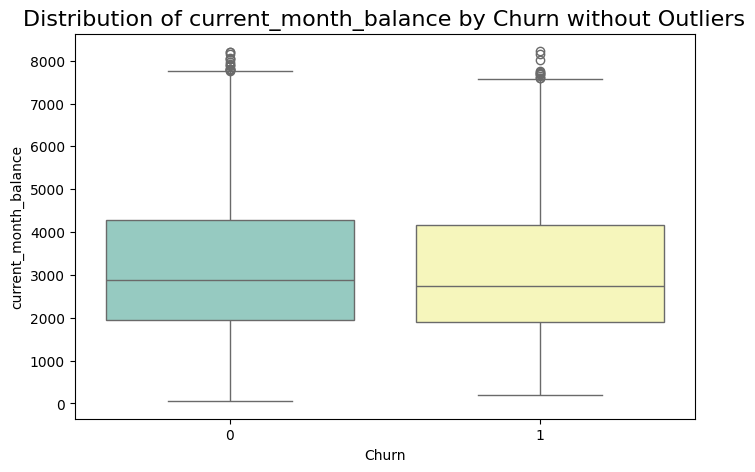

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


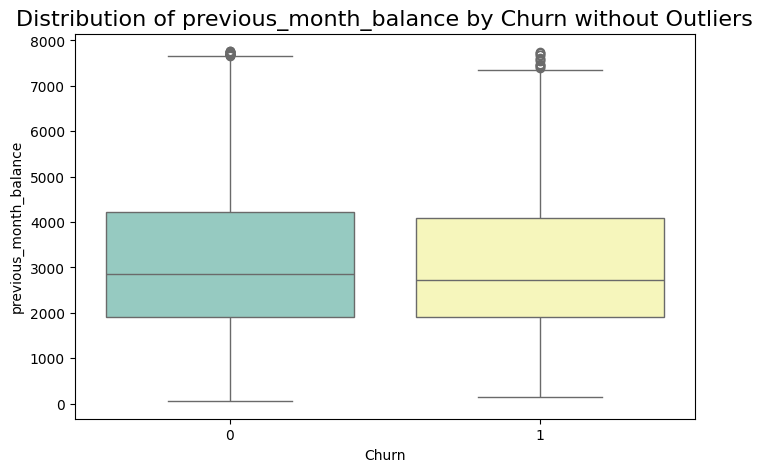

<ipython-input-5-0c166ab1e99e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')


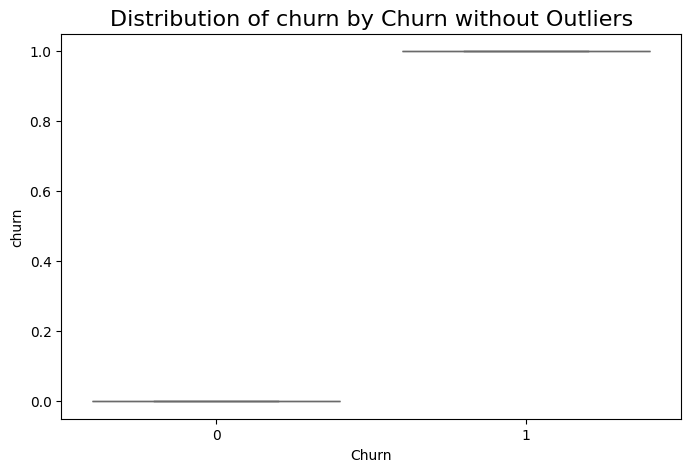

In [ ]:
#@title Data Exploration: Numerical variables
# Create a new DataFrame for visualizations

import seaborn as sns
df_visual = df.copy()

# Determine the numerical features in the dataset excluding categorical ones like 'city', 'customer_nw_category', 'branch_code'
categorical_features = ['city', 'customer_nw_category', 'branch_code']
numerical_features = df_visual.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove the categorical features and 'customer_id' (a unique identifier, not a feature)
numerical_features = [feature for feature in numerical_features if feature not in categorical_features + ['customer_id']]

# Drop outliers based on IQR for each numerical feature
for feature in numerical_features:
    Q1 = df_visual[feature].quantile(0.25)
    Q3 = df_visual[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Only keep rows that do not have an outlier in the current feature
    df_visual = df_visual[(df_visual[feature] >= lower_bound) & (df_visual[feature] <= upper_bound)]

# Reset index due to the row filtering
df_visual.reset_index(drop=True, inplace=True)

# Add the target variable 'churn' back to the visual DataFrame
df_visual['churn'] = df.loc[df_visual.index, 'churn']

# Create box plots for the features without outliers by churn
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='churn', y=feature, data=df_visual, palette='Set3')
    plt.title(f'Distribution of {feature} by Churn without Outliers', fontsize=16)
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()


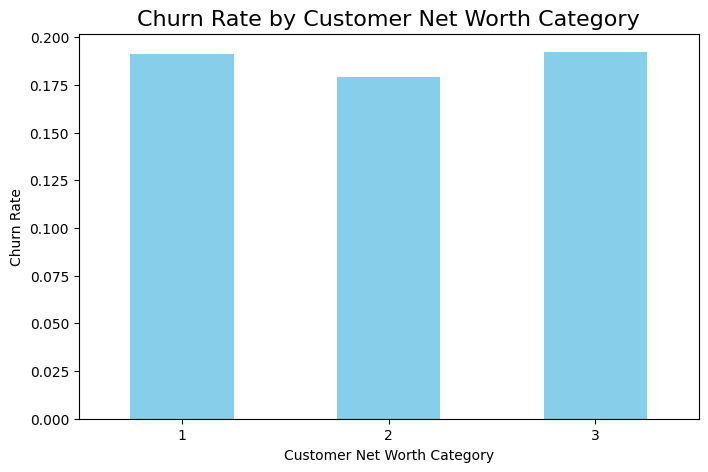

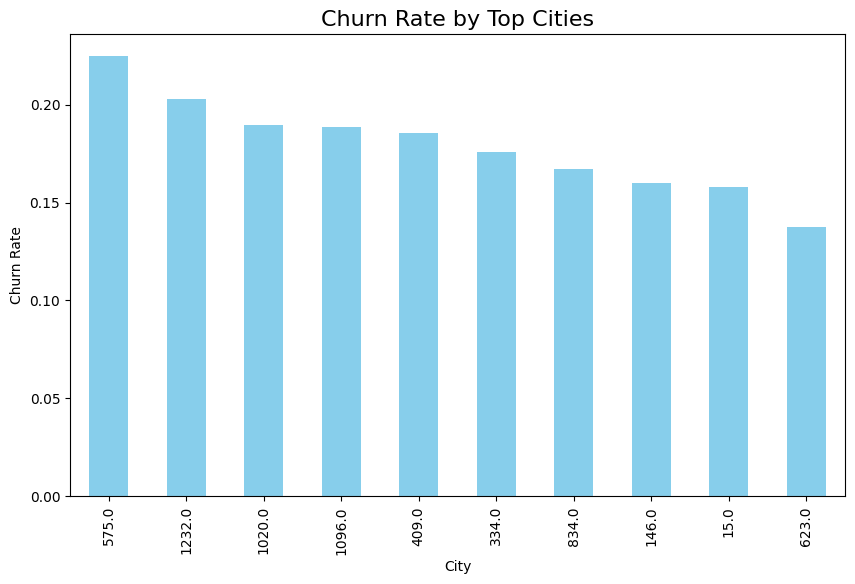

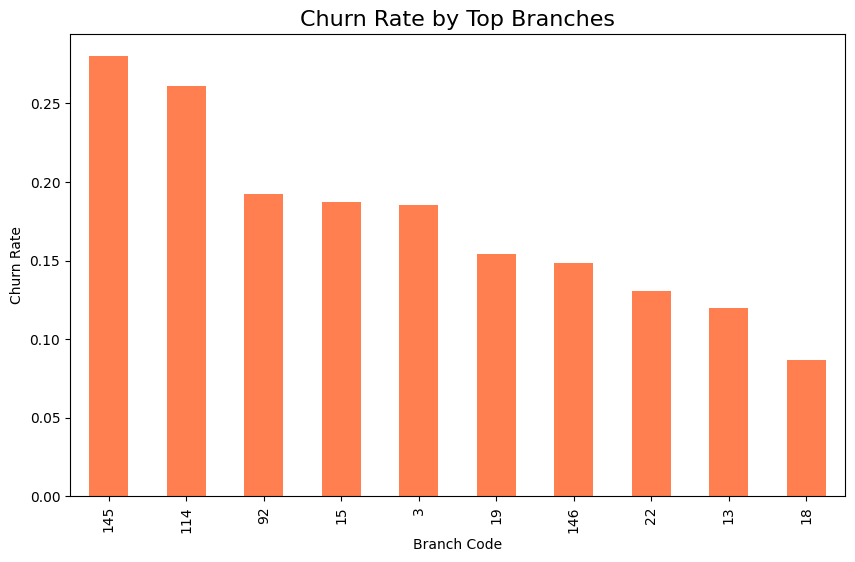

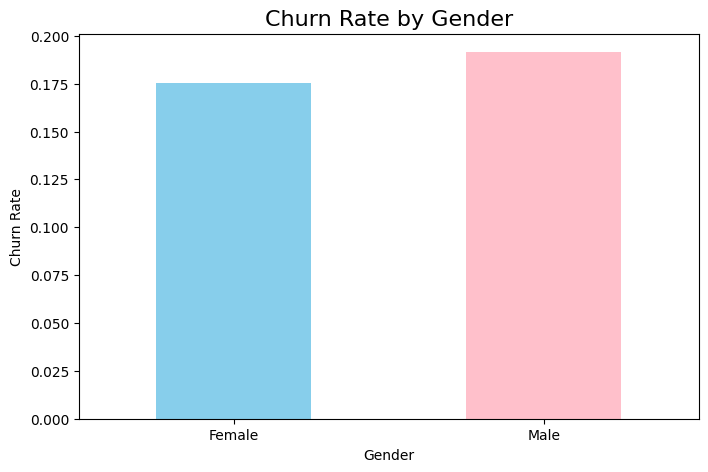

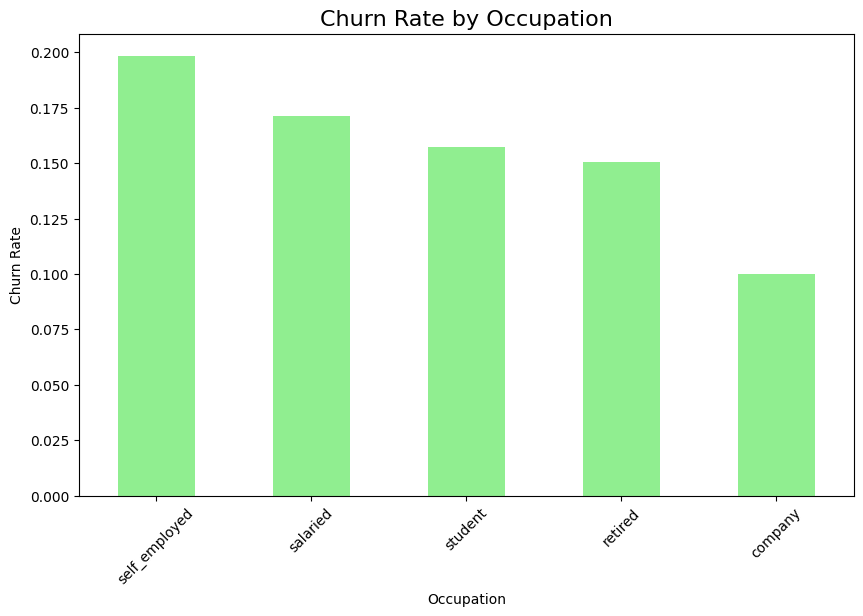

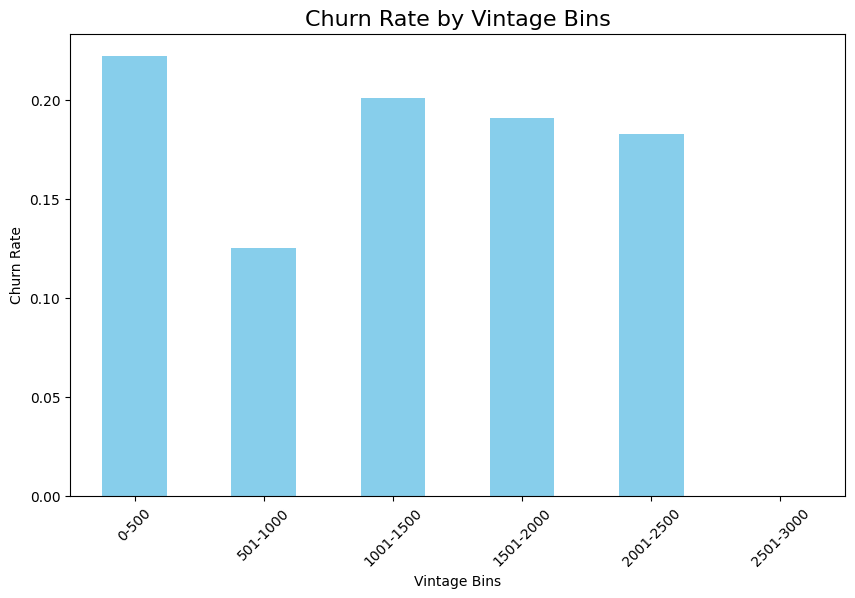

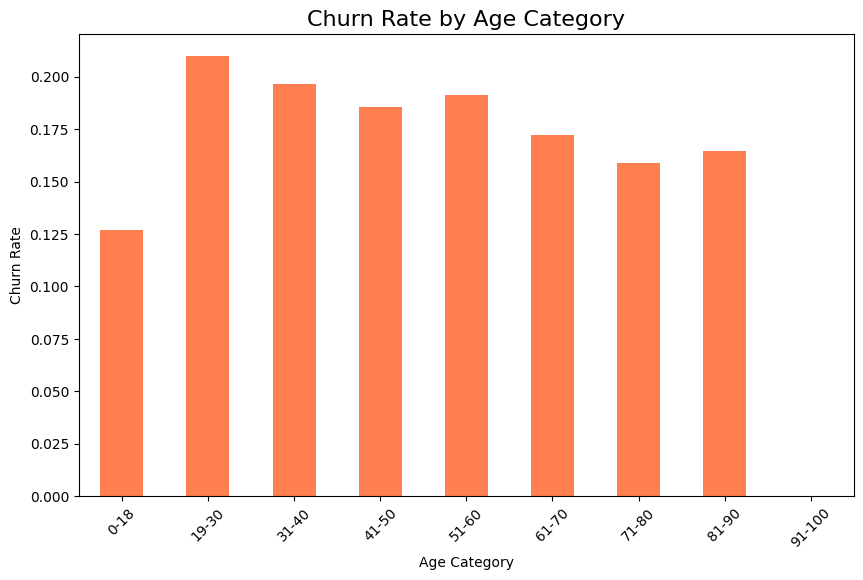

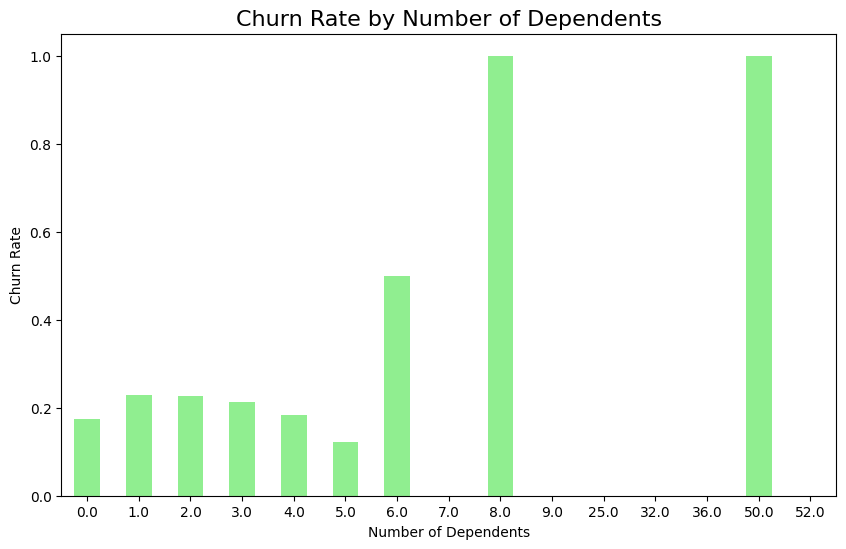

In [ ]:
#@title Data Exploration: Categegorical variables


import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate by customer net worth category
nw_category_churn_rate = df.groupby('customer_nw_category')['churn'].mean()

# Plot churn rate by customer net worth category
plt.figure(figsize=(8, 5))
nw_category_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Customer Net Worth Category', fontsize=16)
plt.xlabel('Customer Net Worth Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()


# We will limit the visualization to the top N categories for clarity.
N = 10

# Churn rate by city
top_cities = df_visual['city'].value_counts().index[:N]
city_churn_rate = df_visual[df_visual['city'].isin(top_cities)].groupby('city')['churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
city_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Top Cities', fontsize=16)
plt.xlabel('City')
plt.ylabel('Churn Rate')
plt.show()

# Churn rate by branch code
top_branches = df_visual['branch_code'].value_counts().index[:N]
branch_churn_rate = df_visual[df_visual['branch_code'].isin(top_branches)].groupby('branch_code')['churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
branch_churn_rate.plot(kind='bar', color='coral')
plt.title('Churn Rate by Top Branches', fontsize=16)
plt.xlabel('Branch Code')
plt.ylabel('Churn Rate')
plt.show()

# Churn rate by gender
plt.figure(figsize=(8, 5))
gender_churn_rate = df.groupby('gender')['churn'].mean()
gender_churn_rate.plot(kind='bar', color=['skyblue', 'pink', 'lightgreen'])
plt.title('Churn Rate by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

# Churn rate by occupation
plt.figure(figsize=(10, 6))
occupation_churn_rate = df.groupby('occupation')['churn'].mean().sort_values(ascending=False)
occupation_churn_rate.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Occupation', fontsize=16)
plt.xlabel('Occupation')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

# Create bins for vintage
df['vintage_bins'] = pd.cut(df['vintage'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000], labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000'])

# Calculate churn rate by vintage bins
vintage_churn_rate = df.groupby('vintage_bins')['churn'].mean()

# Plot churn rate by vintage bins
plt.figure(figsize=(10, 6))
vintage_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Vintage Bins', fontsize=16)
plt.xlabel('Vintage Bins')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

# Create age categories
df['age_category'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Calculate churn rate by age category
age_churn_rate = df.groupby('age_category')['churn'].mean()

# Plot churn rate by age category
plt.figure(figsize=(10, 6))
age_churn_rate.plot(kind='bar', color='coral')
plt.title('Churn Rate by Age Category', fontsize=16)
plt.xlabel('Age Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

# Calculate churn rate by dependents
dependents_churn_rate = df.groupby('dependents')['churn'].mean()

# Plot churn rate by dependents
plt.figure(figsize=(10, 6))
dependents_churn_rate.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Number of Dependents', fontsize=16)
plt.xlabel('Number of Dependents')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()




In [ ]:
#@title Feature Engineering

import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/content/drive/MyDrive/churn_prediction.csv'
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(['customer_id', 'gender', 'city', 'dependents', 'occupation', 'customer_nw_category'], axis=1, inplace=True)

# Create age category and keep only '20-30' as a dummy variable
df['age_20_30'] = ((df['age'] >= 20) & (df['age'] <= 30)).astype(int)
df.drop('age', axis=1, inplace=True)

# Keep only branch_code 145 and 114 as dummy variables
df['branch_code_145'] = (df['branch_code'] == 145).astype(int)
df['branch_code_114'] = (df['branch_code'] == 114).astype(int)
df.drop('branch_code', axis=1, inplace=True)

# Convert 'last_transaction' to number of days passed after the last transaction
df['last_transaction'] = pd.to_datetime(df['last_transaction'])
max_date = df['last_transaction'].max()
df['days_passed_after_last_transaction'] = (max_date - df['last_transaction']).dt.days
df.drop('last_transaction', axis=1, inplace=True)

# Fill missing values for numerical columns with the average
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing values for categorical columns with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Define features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# # Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Print the shape of the training and test sets
print(f'Training set: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Test set: X_test: {X_test.shape}, y_test: {y_test.shape}')


Training set: X_train: (19867, 15), y_train: (19867,)
Test set: X_test: (8515, 15), y_test: (8515,)


Optimization terminated successfully.
         Current function value: 0.439320
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                19867
Model:                          Logit   Df Residuals:                    19851
Method:                           MLE   Df Model:                           15
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                 0.08781
Time:                        07:33:13   Log-Likelihood:                -8728.0
converged:                       True   LL-Null:                       -9568.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.7285      0.022    

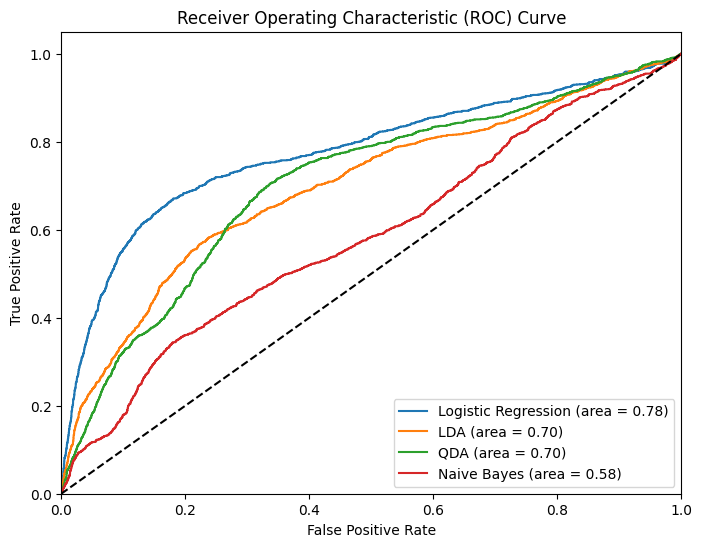

Logistic Regression Metrics:
Accuracy: 0.8285378743394011
Precision: 0.7682926829268293
Recall: 0.08139534883720931
F1-score: 0.14719626168224298
AUC-ROC: 0.7761521740178597

LDA Metrics:
Accuracy: 0.8194950088079859
Precision: 0.6222222222222222
Recall: 0.01808785529715762
F1-score: 0.03515379786566227
AUC-ROC: 0.699083794440309

QDA Metrics:
Accuracy: 0.8180857310628303
Precision: 0.4978723404255319
Recall: 0.0755813953488372
F1-score: 0.13123948401570387
AUC-ROC: 0.7049464733893152

Naive Bayes Metrics:
Accuracy: 0.8147974163241338
Precision: 0.4064516129032258
Recall: 0.040697674418604654
F1-score: 0.07398708162066941
AUC-ROC: 0.5845692261302731



In [ ]:
#@title Modelling
# 1. Logistic Regression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# 1b. Calculate Standard error, Z-statistic, and p-value for each coefficient
# Create a new DataFrame with scaled features and their corresponding column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Add a constant for the intercept term
X_train_sm = sm.add_constant(X_train_scaled_df)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# 2. Linear Discriminative Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# 3. Quadratic Discriminative Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

# 4. Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Define a function to plot the ROC curve
def plot_roc_curve(model, X_test_scaled, y_test, model_name):
    y_score = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plot_roc_curve(log_reg, X_test_scaled, y_test, 'Logistic Regression')
plot_roc_curve(lda, X_test_scaled, y_test, 'LDA')
plot_roc_curve(qda, X_test_scaled, y_test, 'QDA')
plot_roc_curve(gnb, X_test_scaled, y_test, 'Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print performance metrics for all models
models = {'Logistic Regression': log_reg, 'LDA': lda, 'QDA': qda, 'Naive Bayes': gnb}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'AUC-ROC: {roc_auc}\n')


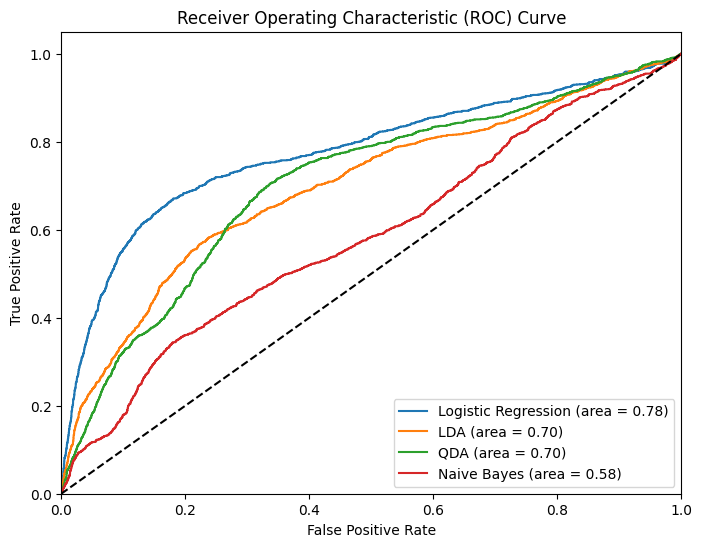

Logistic Regression Metrics (Adjusted):
Accuracy: 0.7923664122137405
Precision: 0.4521322889469104
Recall: 0.6711886304909561
F1-score: 0.5403016120644827
Optimal Threshold: 0.20073294984329795
AUC: 0.7761521740178597

LDA Metrics (Adjusted):
Accuracy: 0.7297709923664122
Precision: 0.35264187866927593
Recall: 0.5820413436692506
F1-score: 0.43919083597367775
Optimal Threshold: 0.1844965491997449
AUC: 0.699083794440309

QDA Metrics (Adjusted):
Accuracy: 0.6634174985320024
Precision: 0.313631221719457
Recall: 0.7164082687338501
F1-score: 0.4362706530291109
Optimal Threshold: 0.00032796375073222207
AUC: 0.7049464733893152

Naive Bayes Metrics (Adjusted):
Accuracy: 0.7338813857897827
Precision: 0.29854096520763185
Recall: 0.34366925064599485
F1-score: 0.3195195195195195
Optimal Threshold: 0.1680752168417234
AUC: 0.5845692261302731



In [ ]:
#@title Adjusting the Tresholds

# Modify the function to return the optimal threshold and AUC score
def plot_roc_curve(model, X_test_scaled, y_test, model_name):
    y_score = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
    return optimal_threshold, roc_auc

# Plot ROC curves for all models and store the optimal thresholds and AUC scores
plt.figure(figsize=(8, 6))
thresholds = {}
auc_scores = {}
for name, model in models.items():
    thresholds[name], auc_scores[name] = plot_roc_curve(model, X_test_scaled, y_test, name)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Adjust the models based on the optimal threshold and recalculate the performance metrics
for name, model in models.items():
    # Get the predicted probabilities for the positive class
    y_scores = model.predict_proba(X_test_scaled)[:, 1]

    # Make predictions based on the optimal threshold
    optimal_threshold = thresholds[name]
    y_pred_optimal = (y_scores >= optimal_threshold).astype(int)

    # Calculate performance metrics for the adjusted model
    accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
    precision_optimal = precision_score(y_test, y_pred_optimal)
    recall_optimal = recall_score(y_test, y_pred_optimal)
    f1_optimal = f1_score(y_test, y_pred_optimal)

    # Print the metrics for the adjusted model
    print(f'{name} Metrics (Adjusted):')
    print(f'Accuracy: {accuracy_optimal}')
    print(f'Precision: {precision_optimal}')
    print(f'Recall: {recall_optimal}')
    print(f'F1-score: {f1_optimal}')
    print(f'Optimal Threshold: {optimal_threshold}')
    print(f'AUC: {auc_scores[name]}\n')


| Metric             | Logistic Regression | LDA         | QDA         | Naive Bayes |
|--------------------|---------------------|-------------|-------------|-------------|
| Accuracy           | 0.7924              | 0.7298      | 0.6634      | 0.7339      |
| Precision          | 0.4521              | 0.3526      | 0.3136      | 0.2985      |
| Recall             | 0.6712              | 0.5820      | 0.7164      | 0.3437      |
| F1-score           | 0.5403              | 0.4392      | 0.4363      | 0.3195      |
| Optimal Threshold  | 0.2007              | 0.1845      | 0.0003      | 0.1681      |
| AUC                | 0.7762              | 0.6991      | 0.7049      | 0.5846      |


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Initialize the models
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# SVM models with different kernels
svm_linear = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
svm_poly = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, probability=True))
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))

# Train the models
bagging_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
gradient_boosting_model.fit(X_train_scaled, y_train)
svm_linear.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

# Define a function to evaluate models
def evaluate_model(model, X_test_scaled, y_test, model_name):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'AUC-ROC: {roc_auc:.4f}\n')

# Evaluate all models
models = {
    'Bagging': bagging_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'SVM Linear': svm_linear,
    'SVM Polynomial': svm_poly,
    'SVM RBF': svm_rbf
}

for name, model in models.items():
    evaluate_model(model, X_test_scaled, y_test, name)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

Bagging Metrics:
Accuracy: 0.8282
Precision: 0.7457
Recall: 0.0833
F1-score: 0.1499
AUC-ROC: 0.7763

Random Forest Metrics:
Accuracy: 0.8665
Precision: 0.7207
Recall: 0.4335
F1-score: 0.5413
AUC-ROC: 0.8329

Gradient Boosting Metrics:
Accuracy: 0.8633
Precision: 0.7069
Recall: 0.4238
F1-score: 0.5299
AUC-ROC: 0.8363

SVM Linear Metrics:
Accuracy: 0.8209
Precision: 0.7255
Recall: 0.0239
F1-score: 0.0463
AUC-ROC: 0.7805

SVM Polynomial Metrics:
Accuracy: 0.8197
Precision: 0.6757
Recall: 0.0161
F1-score: 0.0315
AUC-ROC: 0.7536

SVM RBF Metrics:
Accuracy: 0.8227
Precision: 0.7375
Recall: 0.0381
F1-score: 0.0725
AUC-ROC: 0.7870



Bagging Metrics:
Accuracy: 0.8282
Precision: 0.7457
Recall: 0.0833
F1-score: 0.1499
AUC-ROC: 0.7763

Random Forest Metrics:
Accuracy: 0.8665
Precision: 0.7207
Recall: 0.4335
F1-score: 0.5413
AUC-ROC: 0.8329

Gradient Boosting Metrics:
Accuracy: 0.8633
Precision: 0.7069
Recall: 0.4238
F1-score: 0.5299
AUC-ROC: 0.8363

SVM Linear Metrics:
Accuracy: 0.8209
Precision: 0.7255
Recall: 0.0239
F1-score: 0.0463
AUC-ROC: 0.7805

SVM Polynomial Metrics:
Accuracy: 0.8197
Precision: 0.6757
Recall: 0.0161
F1-score: 0.0315
AUC-ROC: 0.7536

SVM RBF Metrics:
Accuracy: 0.8227
Precision: 0.7375
Recall: 0.0381
F1-score: 0.0725
AUC-ROC: 0.7870



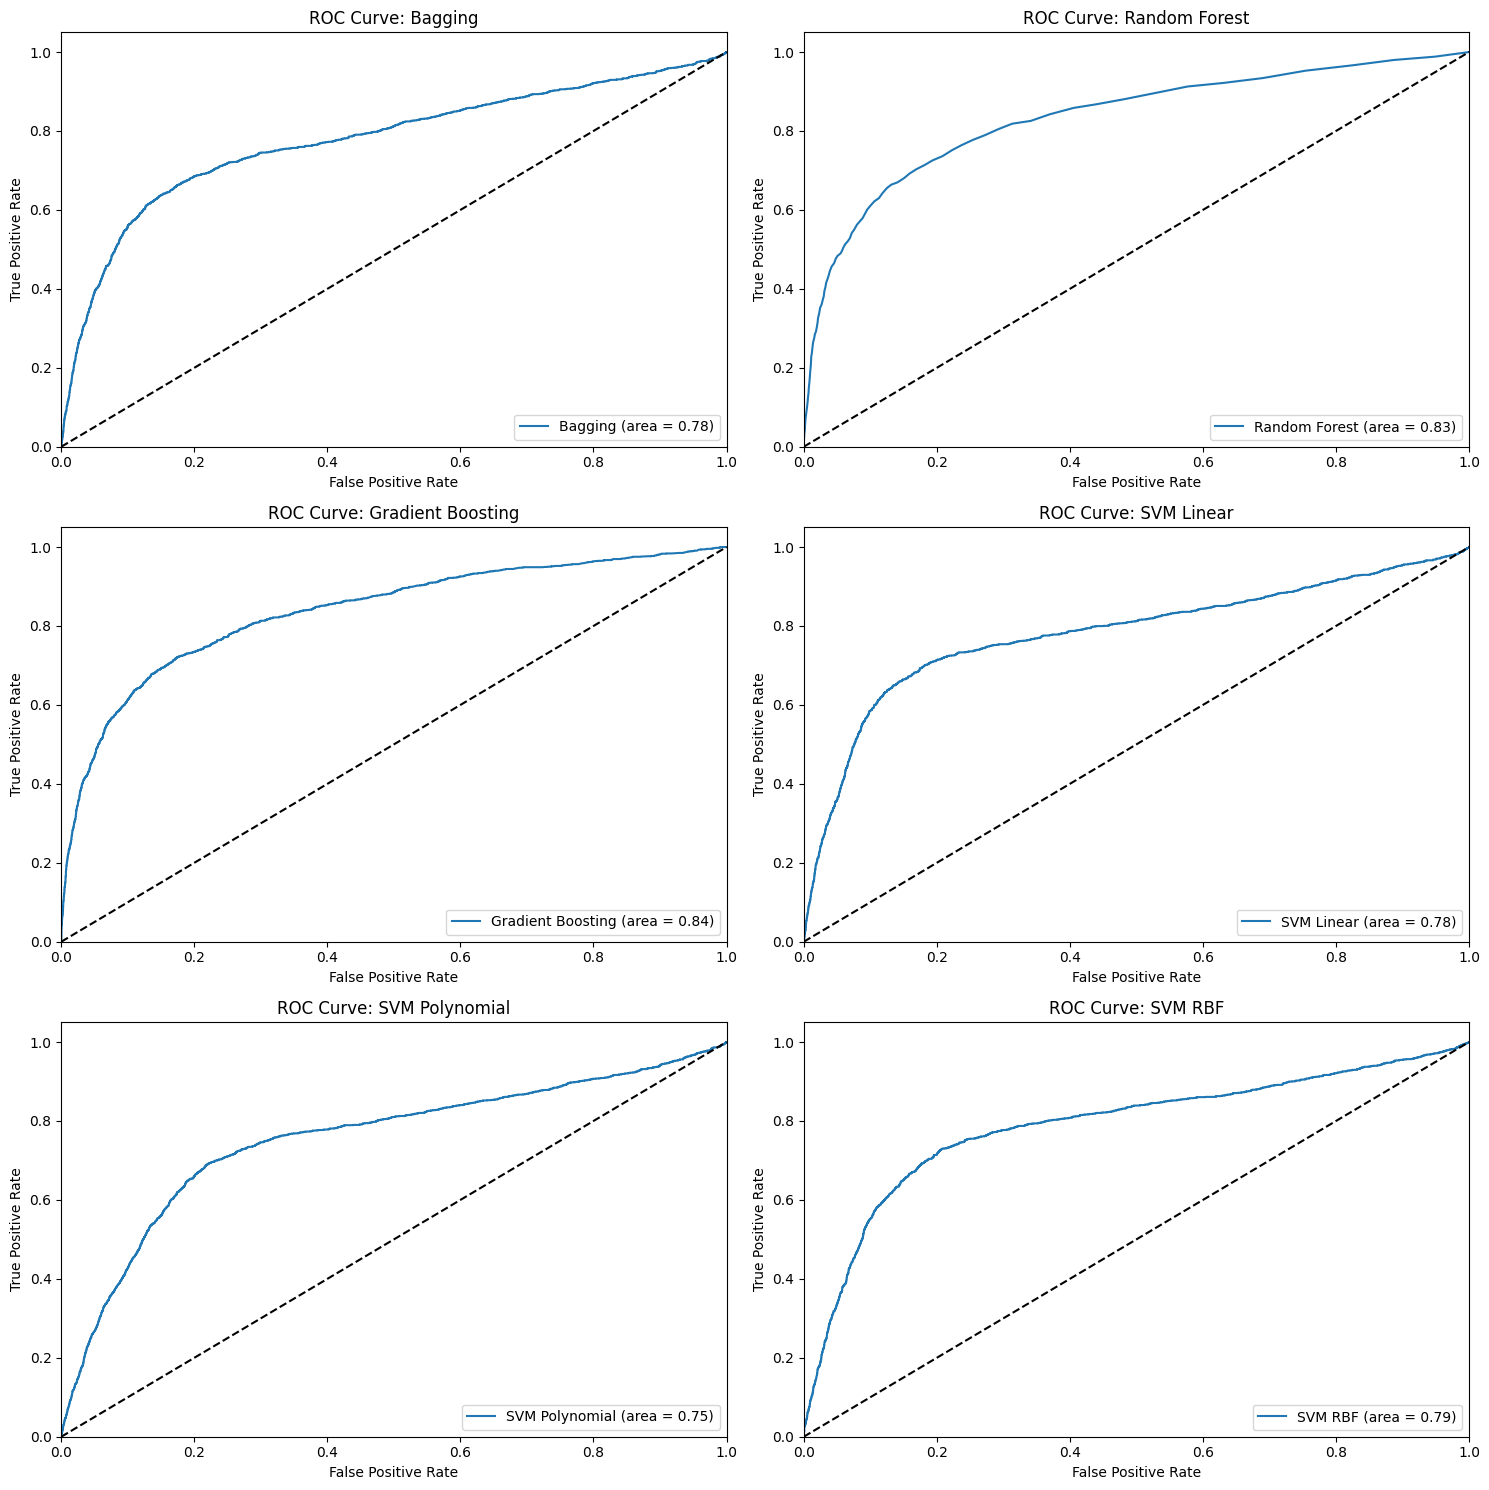

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a function to plot the ROC curve
def plot_roc_curve(model, X_test_scaled, y_test, model_name, ax):
    y_score = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve: {model_name}')
    ax.legend(loc='lower right')

# Evaluate and plot ROC for all models
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

models = {
    'Bagging': bagging_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'SVM Linear': svm_linear,
    'SVM Polynomial': svm_poly,
    'SVM RBF': svm_rbf
}

for ax, (name, model) in zip(axes, models.items()):
    evaluate_model(model, X_test_scaled, y_test, name)
    plot_roc_curve(model, X_test_scaled, y_test, name, ax)

plt.tight_layout()
plt.show()


| Model               | Accuracy | Precision | Recall | F1-score | AUC-ROC |
|---------------------|----------|-----------|--------|----------|---------|
| Bagging             | 0.8282   | 0.7457    | 0.0833 | 0.1499   | 0.7763  |
| Random Forest       | 0.8665   | 0.7207    | 0.4335 | 0.5413   | 0.8329  |
| Gradient Boosting   | 0.8633   | 0.7069    | 0.4238 | 0.5299   | 0.8363  |
| SVM Linear          | 0.8209   | 0.7255    | 0.0239 | 0.0463   | 0.7805  |
| SVM Polynomial      | 0.8197   | 0.6757    | 0.0161 | 0.0315   | 0.7536  |
| SVM RBF             | 0.8227   | 0.7375    | 0.0381 | 0.0725   | 0.7870  |


| Model               | Characteristics                                                             | Applications                                  |
|---------------------|-----------------------------------------------------------------------------|-----------------------------------------------|
| Bagging             | Ensemble method using bootstrapping to create multiple versions of estimators | Classification, Regression                    |
| Random Forest       | Ensemble of decision trees, uses bagging                                    | Classification, Regression, Feature Selection |
| Gradient Boosting   | Sequentially adds predictors to an ensemble, each correcting its predecessor | Classification, Regression                    |
| SVM Linear          | Uses a linear kernel to find a hyperplane with the maximum margin           | Binary classification                         |
| SVM Polynomial      | Uses a polynomial kernel to model non-linear decision boundaries            | Non-linear classification                     |
| SVM RBF             | Uses a radial basis function kernel to handle non-linear classification     | Non-linear classification                     |


| Model               | Strengths                                                         | Weaknesses                                                       |
|---------------------|-------------------------------------------------------------------|------------------------------------------------------------------|
| Bagging             | Reduces variance, robust against overfitting                       | Can be computationally expensive, less interpretable             |
| Random Forest       | High accuracy, handles unbalanced data well                        | Not suitable for very high-dimensional data, complex             |
| Gradient Boosting   | Often provides predictive accuracy that cannot be beat             | Prone to overfitting if not tuned properly, computationally demanding |
| SVM Linear          | Effective in high-dimensional spaces, especially when linearly separable | Poor performance with large data sets, not suitable for non-linear problems |
| SVM Polynomial      | Can model non-linear patterns                                      | Requires careful tuning of the kernel's degree, can be slow     |
| SVM RBF             | Can handle data where the boundary between classes is non-linear  | Computationally intensive, sensitive to the choice of kernel parameters  |


Aggregate Results

| Model               | Accuracy | Precision | Recall | F1-score | AUC-ROC |
|---------------------|----------|-----------|--------|----------|---------|
| Random Forest       | 0.87     | 0.72      | 0.43   | 0.54     | 0.83    |
| Bagging             | 0.83     | 0.75      | 0.08   | 0.15     | 0.78    |
| Gradient Boosting   | 0.86     | 0.71      | 0.42   | 0.53     | 0.84    |
| SVM Linear          | 0.82     | 0.73      | 0.02   | 0.05     | 0.78    |
| SVM Polynomial      | 0.82     | 0.68      | 0.02   | 0.03     | 0.75    |
| SVM RBF             | 0.82     | 0.74      | 0.04   | 0.07     | 0.79    |
| Logistic Regression | 0.83     | 0.77      | 0.08   | 0.15     | 0.78    |
| LDA                 | 0.82     | 0.62      | 0.02   | 0.04     | 0.70    |
| QDA                 | 0.82     | 0.50      | 0.08   | 0.13     | 0.70    |
| Naive Bayes         | 0.81     | 0.41      | 0.04   | 0.07     | 0.58    |


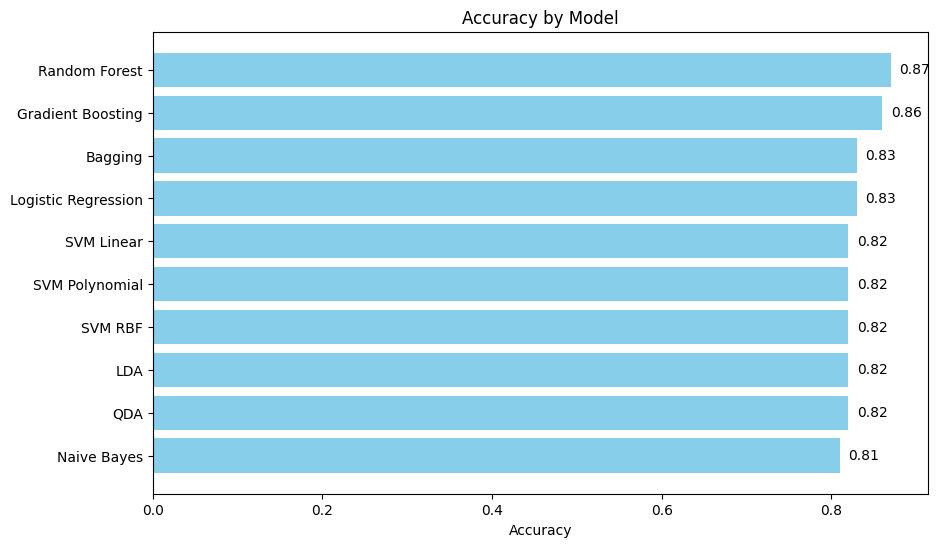

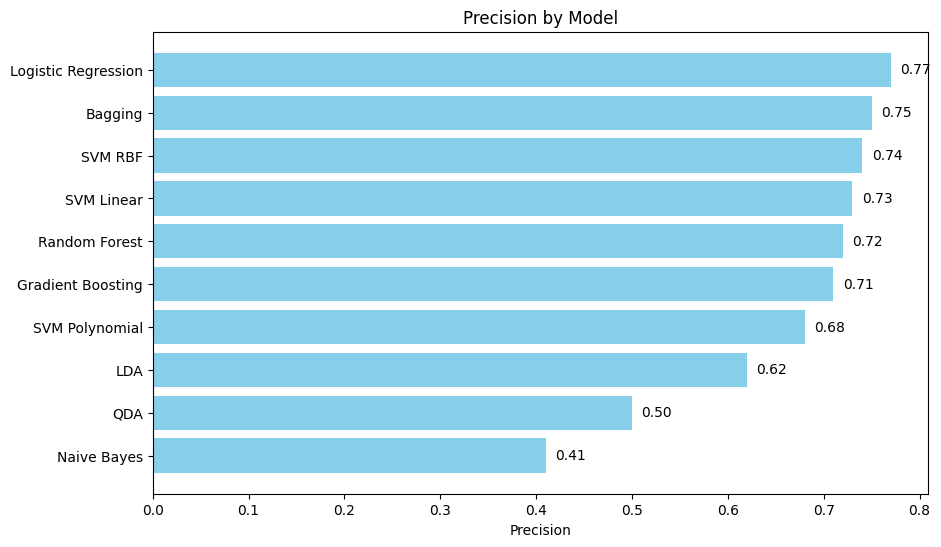

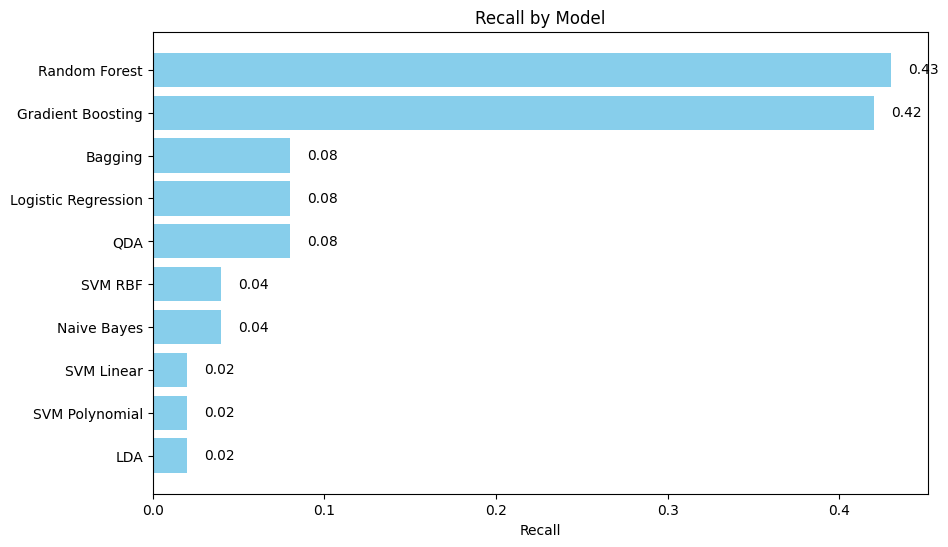

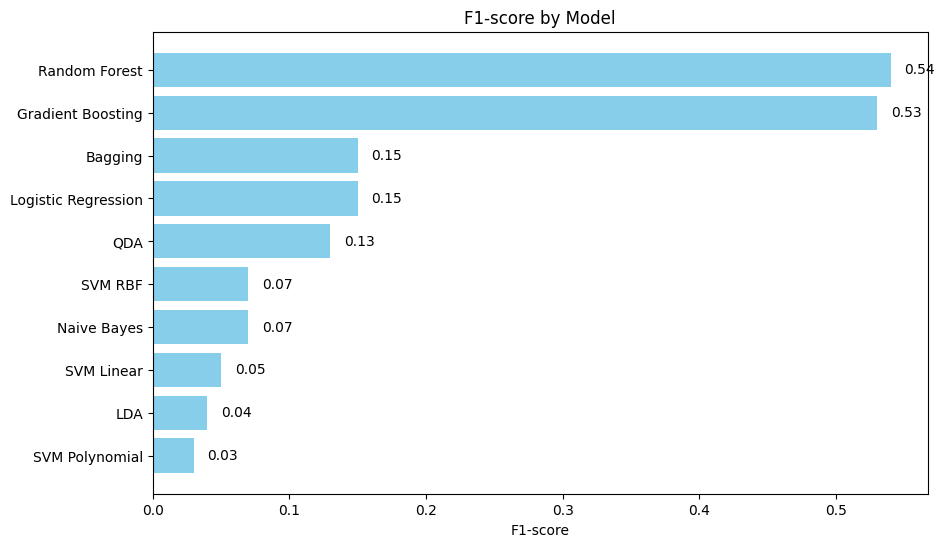

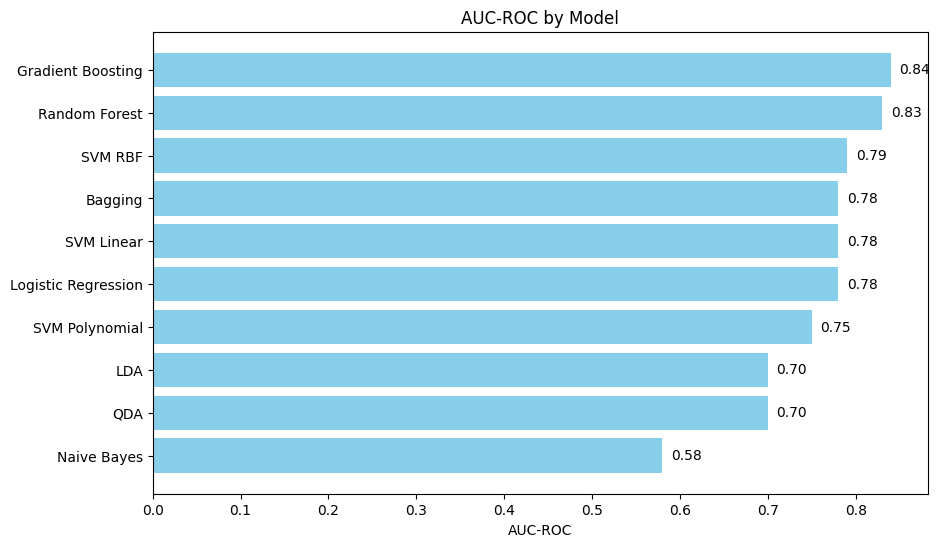

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['Random Forest', 'Bagging', 'Gradient Boosting', 'SVM Linear', 'SVM Polynomial', 'SVM RBF', 'Logistic Regression', 'LDA', 'QDA', 'Naive Bayes'],
    'Accuracy': [0.87, 0.83, 0.86, 0.82, 0.82, 0.82, 0.83, 0.82, 0.82, 0.81],
    'Precision': [0.72, 0.75, 0.71, 0.73, 0.68, 0.74, 0.77, 0.62, 0.50, 0.41],
    'Recall': [0.43, 0.08, 0.42, 0.02, 0.02, 0.04, 0.08, 0.02, 0.08, 0.04],
    'F1-score': [0.54, 0.15, 0.53, 0.05, 0.03, 0.07, 0.15, 0.04, 0.13, 0.07],
    'AUC-ROC': [0.83, 0.78, 0.84, 0.78, 0.75, 0.79, 0.78, 0.70, 0.70, 0.58]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to plot bar charts with numbers on bars
def plot_metric(metric):
    sorted_df = df.sort_values(by=metric, ascending=False)
    plt.figure(figsize=(10, 6))
    bars = plt.barh(sorted_df['Model'], sorted_df[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(f'{metric} by Model')
    plt.gca().invert_yaxis()

    # Add numbers on bars
    for bar in bars:
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')

    plt.show()

# Plot each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
for metric in metrics:
    plot_metric(metric)
